In [94]:
import os
import pandas as pd

In [95]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [96]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 

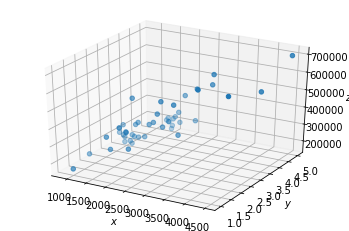

In [98]:
fig = plt.figure()
ax = plt.axes(projection ='3d') 
x = data2['Size']
y = data2['Bedrooms']
z = data2['Price']
ax.scatter(x,y,z)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [99]:
# ex.1
for column in data2:
    data2[column] = (data2[column] - data2[column].mean()) / data2[column].std()

data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


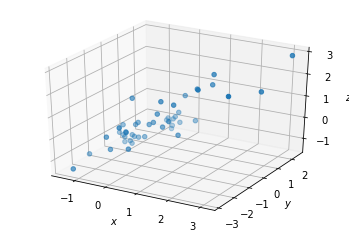

In [100]:
fig = plt.figure()
ax = plt.axes(projection ='3d') 
x = data2['Size']
y = data2['Bedrooms']
z = data2['Price']
ax.scatter(x,y,z)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [101]:
# ex.2
data2.insert(0, "Ones", 1) 
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [102]:
x = data2[['Ones', 'Size', 'Bedrooms']]
y = data2[['Price']]
x.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [103]:
y.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [104]:
import numpy as np

In [105]:
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.zeros((x.shape[1], 1))

In [106]:
def computeCost(_x, _y, _theta):
    # 2-3 code lines as series of matrix operation
    m = _x.shape[0]
    f_x = _x * _theta
    # f_x = np.dot(x, theta)
    residuals = f_x - _y
    return np.sum(np.square(residuals)) / (2 * m)

In [107]:
computeCost(x,y,theta)

0.48936170212765967

In [108]:
def gradient_prosty(_x, _y, _theta, _alpha, _it):
    m = len(_y)
    cost_history = np.zeros(_it)
    for i in range(0,_it):
        f_x = _x * _theta
        residuals = f_x - _y
        _theta = _theta - (1/m) * _alpha * (_x.T * residuals)
        cost_history[i] = computeCost(_x,_y, _theta)
    
    return _theta, cost_history

In [109]:
alpha = 0.01
it = 1000
gradient_prosty(x,y,theta,alpha, it)

(matrix([[-1.11134506e-16],
         [ 8.78503652e-01],
         [-4.69166570e-02]]),
 array([0.4805491 , 0.47198588, 0.46366462, 0.45557814, 0.44771948,
        0.44008189, 0.43265881, 0.42544389, 0.41843096, 0.41161404,
        0.40498735, 0.39854524, 0.39228228, 0.38619317, 0.38027278,
        0.37451612, 0.36891839, 0.36347488, 0.35818107, 0.35303254,
        0.34802503, 0.34315438, 0.33841659, 0.33380775, 0.32932407,
        0.3249619 , 0.32071767, 0.31658793, 0.31256934, 0.30865863,
        0.30485268, 0.30114841, 0.29754287, 0.29403318, 0.29061655,
        0.28729027, 0.28405173, 0.28089837, 0.27782772, 0.27483739,
        0.27192505, 0.26908845, 0.26632541, 0.26363379, 0.26101154,
        0.25845666, 0.25596722, 0.25354134, 0.25117719, 0.248873  ,
        0.24662705, 0.24443769, 0.24230329, 0.24022228, 0.23819315,
        0.23621442, 0.23428466, 0.23240248, 0.23056652, 0.22877549,
        0.22702811, 0.22532316, 0.22365943, 0.22203576, 0.22045104,
        0.21890417, 0.21739409

In [24]:
results = []
best_result = None
optimal_parameters = None
for alpha in np.arange(0,0.4,0.01):
    for it in range(1000,5000,1000):
        theta_result, cost_result = gradient_prosty(x,y,theta,alpha, it)
        results.append((theta_result, cost_result))
        if not best_result or cost_result[-1] < best_result:
            best_result = cost_result[-1]
            optimal_parameters = theta_result

In [110]:
for i in results:
    print(i)

print("best result", best_result)
print("optimal parameters", optimal_parameters)

(matrix([[0.],
        [0.],
        [0.]]), array([0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
       0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617, 0.4893617,
      

(matrix([[-5.96922039e-17],
        [ 8.84765988e-01],
        [-5.31788197e-02]]), array([0.34356619, 0.26504788, 0.22122686, 0.19555946, 0.17960338,
       0.16901564, 0.16153306, 0.15595235, 0.15161417, 0.14814167,
       0.14530731, 0.14296476, 0.14101355, 0.13938051, 0.1380098 ,
       0.13685726, 0.13588715, 0.13507008, 0.13438164, 0.13380145,
       0.13331243, 0.13290021, 0.13255272, 0.13225979, 0.13201284,
       0.13180465, 0.13162914, 0.13148118, 0.13135644, 0.13125129,
       0.13116264, 0.1310879 , 0.13102489, 0.13097178, 0.130927  ,
       0.13088925, 0.13085742, 0.13083059, 0.13080797, 0.1307889 ,
       0.13077283, 0.13075927, 0.13074785, 0.13073822, 0.13073009,
       0.13072325, 0.13071748, 0.13071261, 0.13070851, 0.13070505,
       0.13070214, 0.13069968, 0.13069761, 0.13069586, 0.13069439,
       0.13069315, 0.1306921 , 0.13069122, 0.13069048, 0.13068985,
       0.13068932, 0.13068887, 0.1306885 , 0.13068818, 0.13068791,
       0.13068769, 0.1306875 , 0.13068734, 0.

(matrix([[-5.76843537e-17],
        [ 8.84765988e-01],
        [-5.31788197e-02]]), array([0.24759268, 0.18745049, 0.16590722, 0.15465034, 0.14744625,
       0.14249733, 0.13902687, 0.13657941, 0.13485076, 0.13362932,
       0.13276616, 0.13215618, 0.13172511, 0.13142048, 0.13120519,
       0.13105305, 0.13094554, 0.13086955, 0.13081586, 0.13077791,
       0.13075109, 0.13073214, 0.13071875, 0.13070928, 0.1307026 ,
       0.13069787, 0.13069453, 0.13069217, 0.1306905 , 0.13068932,
       0.13068849, 0.1306879 , 0.13068748, 0.13068719, 0.13068698,
       0.13068683, 0.13068673, 0.13068666, 0.13068661, 0.13068657,
       0.13068654, 0.13068652, 0.13068651, 0.1306865 , 0.1306865 ,
       0.13068649, 0.13068649, 0.13068649, 0.13068648, 0.13068648,
       0.13068648, 0.13068648, 0.13068648, 0.13068648, 0.13068648,
       0.13068648, 0.13068648, 0.13068648, 0.13068648, 0.13068648,
       0.13068648, 0.13068648, 0.13068648, 0.13068648, 0.13068648,
       0.13068648, 0.13068648, 0.13068648, 0.

In [121]:
theta = np.matrix(np.array([-5.29481896e-17, 8.84765988e-01, -5.31788197e-02])).T
print("Cost for theta = {} is equal {} ".format(theta, computeCost(x,y,theta)))

Cost for theta = [[-5.29481896e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]] is equal 0.130686480539042 


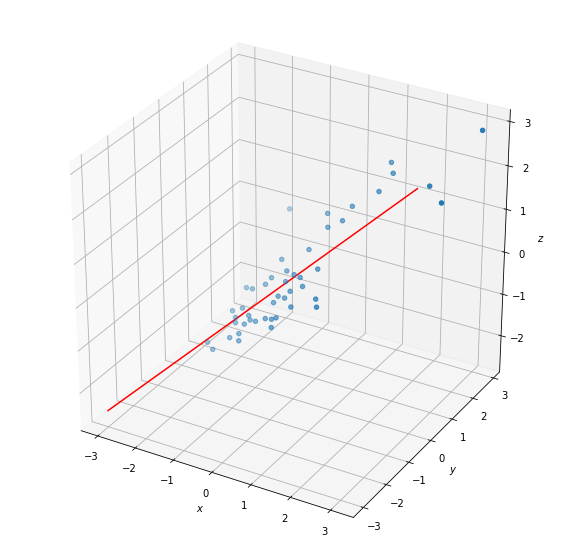

In [122]:
x_old = data2['Size']
x_regression = np.arange(-3, 3)
y_regression = np.arange(-3, 3)
theta_f = list(theta.flat)
z_predict = theta_f[0] + theta_f[1] * x_regression + theta_f[2] * y_regression


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')  
ax.scatter(x_old,y,z)
ax.plot3D(x_regression, y_regression, z_predict,'r-')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

[[-5.52276900e-17  8.78503652e-01 -4.69166570e-02]]
[[-5.52276900e-17]
 [ 8.78503652e-01]
 [-4.69166570e-02]]


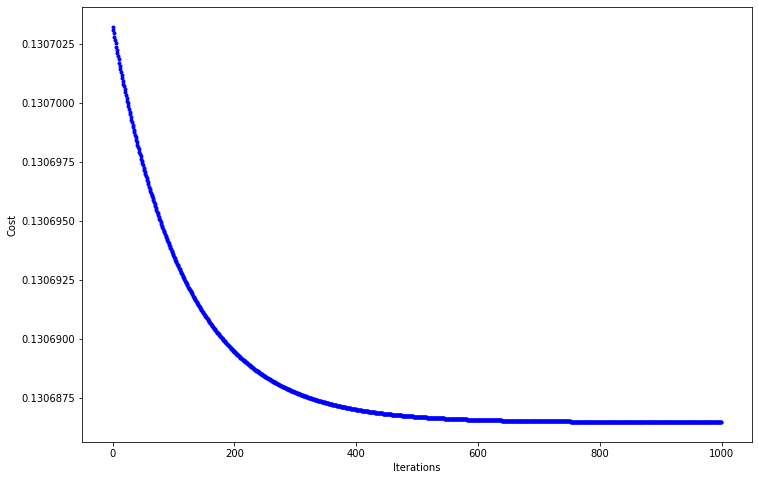

In [126]:
alpha = 0.01
it = 1000
theta = np.matrix(np.array([-5.52276900e-17, 8.78503652e-01, -4.69166570e-02])).T
theta_result, cost_history_result = gradient_prosty(x,y,theta,alpha,it)
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(it),cost_history_result,'b.')